In [3]:
from astropy.convolution import *
import sys
import os
sys.path.append(os.path.abspath('..'))
%matplotlib notebook
# utils=os.path.abspath('..')
from utils import *
import time
from KBs import *
(HTML(tog))

In [4]:
convolve_int=lambda a,fir,method:np.around(convolve(a,fir,method)).astype(np.int);

def csv2dat(fname):
    import csv 
    import numpy as np
    dat=[];
    with open(fname, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter='\t')
        for row in (spamreader):
            dat+=[row];

    log = 'Used \''+fname+'\' as input ';


    return (np.array(dat),log);

# if not 'input_rulestr' in locals():
#     input_rulestr='000000000060031c61c67f86a0';
# input_rulestr
# CA_sys

In [5]:

# @function
def measure_temperature(sys0=None,hdist=None,*args,**kwargs):
#     varargin = measure_temperature.varargin
#     nargin = measure_temperature.nargin
    sysX=copy.copy(sys0)
    jmax=sysX.N;
    avi=sysX.rdf()
    siz=avi.shape
    siz=(sysX.hmax,)+siz;
    tmp=np.zeros(siz)
    smtmp=np.zeros(siz)

    avc=avi
    i=0
    fir=np.reshape(2 ** (np.arange(0,9)),[1,3,3])
    trans=6
    mtp=0
    stp=0
    while i+1 < sysX.hmax:

        i=i + 1
        avcnew=(sysX.adv(avc,i))
        cavc=convolve_int(avc,fir,'wrap').astype(np.int);
        cavcnew=convolve_int(avcnew,fir,'wrap').astype(np.int);
        idx=np.ravel_multi_index((cavc,cavcnew),[2**9,2**9]);
        tmp[i,:,:,:]=np.expand_dims(hdist.flat[idx],0)
        if i >= trans:
            smtmpnow=np.mean(tmp[i - trans:i,:,:,:],axis=0)
            smtmp[i - trans,:,:,:]=smtmpnow
            if i >= trans + 10:
                mtp=np.mean(smtmpnow.flat)
                stpmat=((smtmp[i - trans,:,:,:] - smtmp[i - trans - trans,:,:,:]))
                a=np.mean(np.abs(stpmat.flat))
                b=abs(np.mean(stpmat.flat))
                stp=a - b
                stp1=np.mean(avcnew.flat)
                stp1=min(stp1,1 - stp1)
        avc=avcnew;
        #     im1=[avc(1,:,:)];
        if mtp < 0.02 and i > 20:
            break
    
    fam_alias=sys0.familyname+'_'+sys0.alias;
# /home/shouldsee/Documents/repos/CA_tfmat/custom_function/measure_temperature.m:55
    # s=sprintf('%s\\t%s\\t%d\\t%f\\t%f\\t%f\\n',fam_alias,num2str(sys0.od),i,mtp,stp,stp1)
    s='{}\t{}\t{:d}\t{:f}\t{:f}\t{:f}\n'.format(fam_alias,sysX.rulestr,i,mtp,stp,stp1)
# /home/shouldsee/Documents/repos/CA_tfmat/custom_function/measure_temperature.m:56
    return s
    
# if __name__ == '__main__':
#     pass
    

In [6]:
### Profiling loop
def profile(input_list):
    output_data=[];    
    repeat=2;
    # input_list=[input_rulestr];
    ipt_list=input_list*repeat;
    # for i in range(5):
    l_ipt=len(input_list)
    log = ['Log of the process:'];
    logs='Starting to profile {:d} rules at {:d} replicates,\n totaling {:d} instances'.format(l_ipt,repeat,l_ipt*repeat);
    log += [logs];
    # print('Starting to profile {:d} rules at {:d} replicates,\n totaling {:d} instances'.format(l_ipt,repeat,l_ipt*repeat))

    for num,rulestr in enumerate(ipt_list):
        ca1=CA_sys(familyname,rulestr,[400,100,400]);
        ca1.rulestr2alias();
        s=measure_temperature(ca1,hdist);
        output_data+=[s];
    #     print('{:d} of {:d}'.format(num,len(ipt_list)))
        logs =('{:d} of {:d} '.format(num,len(ipt_list)));
        log += [logs];
    temp_data=[];
    # sample_data=[]
    for line in output_data:
        temp_data+=[line.rstrip('\n').split('\t')];
    sample_data=np.array(temp_data)
    # print('data is succesfully generated at {:d} replicates'.format(repeat))
    logs=('data is succesfully generated at {:d} replicates'.format(repeat))

    log  += [logs];

    # print('\n Detail of the input:')
    logs='\n Detail of the input:';
    log+=[logs];
    for k,v in ca1.__dict__.items():
        if not callable(v):
    #         print(k+str(v).ljust(-10))
    #         print("{:5} {:<15} {:<10}".format('',k, str(v)))

            logs=("{:5} {:<15} {:<10}".format('',k, str(v)));
            log+=[logs];
    return (sample_data,log);


In [2]:
# #test
# ca1=CA_sys('2dntca',input_rulestr,[600,100,400]);
# ca1.rulestr2alias();
# s=measure_temperature(ca1,hdist);
# output_data=[];
from os import environ

if 'query' not in locals():
    query = envrion.get('query');
    if not query==None:        
        query = environ['query'];
        if query[-4:]=='.csv':
            query_type = 'csv';
        else:
            query_type = 'rulestr';
#             familyname, input_rulestr = query.split('_');
    else:
    #     familynam
        query='2dntca_000000000060031c61c67f86a0';
        query_type = 'rulestr'
#         familyname, input_rulestr = query.split('_');
        print('fail to fetch query, using default rule, B3/S23 \n' +
        'example query'+query);
        ## Using B3/S23 as example


None


In [12]:

if query_type == 'csv':
#     sample_dat, log = 
    sample_data, log=csv2dat(query);
    print('data loaded')
if query_type == 'rulestr':
    familyname, input_rulestr = query.split('_');
    sample_data, log= profile([input_rulestr])
    print('data generated')

data loaded


In [ ]:
# import numpy as np

# # TEST sample_data
# sample_data=np.array([['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.148772', '0.087523',
#         '0.089563'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.152794', '0.086693',
#         '0.091644'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.148733', '0.089657',
#         '0.089387'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.150105', '0.092000',
#         '0.090981'],
#        ['2dntca_b3ianjrecqyks2ac3i2e3a2k3nj2i3re2n3cqyk',
#         '000000000060031c61c67f86a0', '99', '0.153150', '0.089772',
#         '0.090938']], 
#       dtype='<U46')

## Landscape of the observed dynamics
* Hover on the point to get the NTCA(non-totalistic cellular automata) rule-string. Click to display the rulestring as a copyable string.
* Click on the bottom-left widgets to Zoom-and-pan

/home/shouldsee/.local/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


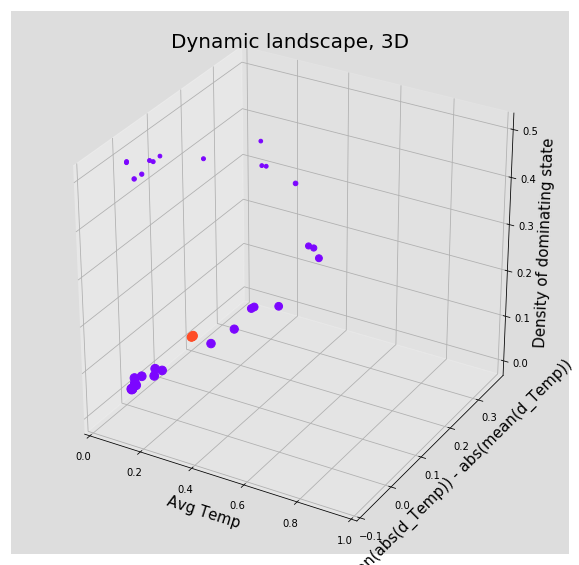

In [13]:
### Plotting sample_data

%matplotlib inline
# mpld3.enable_notebook()
from graphics import *
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#DDDDDD'
#                                        ,projection='3d'
                                      ))
fig.set_size_inches([6,6])

ax.grid(color='white', linestyle='solid')
ax.set_ylim(-.1,0.38)
ax.set_xlim(0,1)

fig2,ax2=plt.subplots(subplot_kw=dict(axisbg='#DDDDDD'
                                       ,projection='3d'
                                      ))
fig2.set_size_inches([10,10])
# fig2.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.3)

ax2.grid(color='white', linestyle='solid')
ax2.set_ylim(-.1,0.38)
ax2.set_xlim(0,1)

fig,ax,fig2,ax2 = make_figure((fig,ax,fig2,ax2),sample_data)
fig.set_size_inches([7,7])
ax.set_ylim(-.1,0.38)
ax.set_xlim(0,1)

mpld3.display(fig)


In [32]:
import numpy as np

sum(float(x)>0.3 for x in list(sample_data[:,3]))/sample_data.shape[0]

(140, 6)

In [ ]:
# len(ntca_list)
# .shape
# print(tst_data)
print('\n'.join(log));

In [ ]:
# from nbconvert import HTMLExporter
# import codecs
# import nbformat
# exporter = HTMLExporter()
# # execfile()
# output_notebook = nbformat.read('calc_temp.ipynb', as_version=4)
# output, resources = exporter.from_notebook_node(output_notebook)
# codecs.open('test.html', 'w', encoding='utf-8').write(output)